In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
training_dataset = torchvision.datasets.MNIST(root = "./data",
                                              train = True,
                                              transform = transforms.ToTensor(),
                                              download = True)

test_dataset = torchvision.datasets.MNIST(root = "./data",
                                              train = False,
                                              transform = transforms.ToTensor(),
                                              download = True)

In [5]:
batch_size = 100

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = training_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

In [7]:
print(f"There are total {len(train_loader)} batches in our training dataset with each batch of size {batch_size}, so there are total of {len(train_loader) * batch_size} samples")
print(f"There are total {len(test_loader)} batches in our testing dataset with each batch of size {batch_size}, so there are total of {len(test_loader) * batch_size} samples")

There are total 600 batches in our training dataset with each batch of size 100, so there are total of 60000 samples
There are total 100 batches in our testing dataset with each batch of size 100, so there are total of 10000 samples


In [8]:
examples = iter(train_loader)

In [9]:
examples_data, examples_targets = next(examples)

In [10]:
examples_data.shape, examples_targets.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

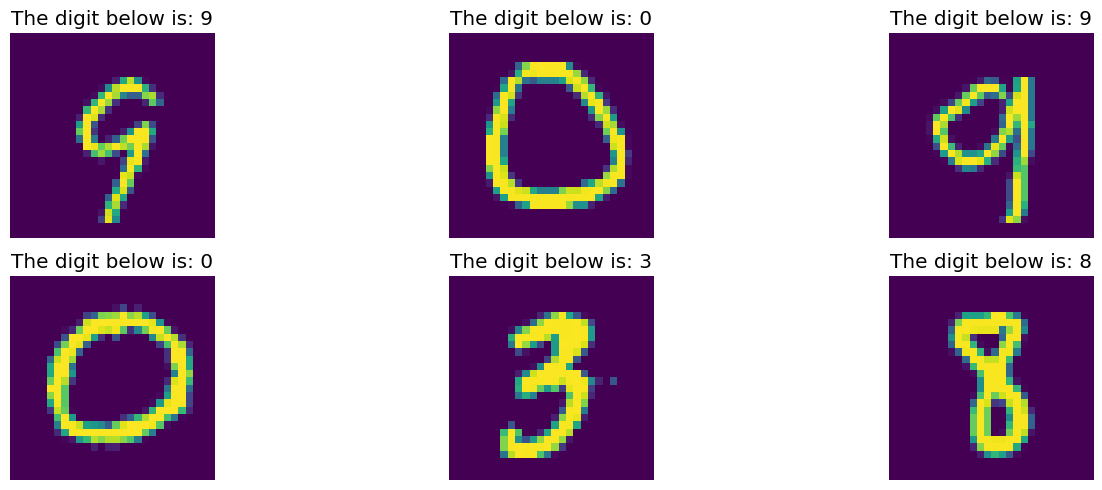

In [11]:
plt.figure(figsize = (15, 5))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(examples_data[i][0])
    plt.title(f"The digit below is: {examples_targets[i].item()}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
input_size = 784
hidden_size = 100
num_classes = 10

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        output = self.linear1(x)
        output = self.relu(output)
        output = self.linear2(output)
        return output

In [14]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [15]:
learning_rate = 0.001

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [17]:
epochs = 3
n_total_steps = len(train_loader)

In [18]:
for epoch in range(1, epochs + 1):
    for i, (images_batch, labels_batch) in enumerate(train_loader):
        images_batch = images_batch.view(-1, input_size).to(device)
        labels_batch = labels_batch.to(device)

        predictions = model(images_batch)
        loss = criterion(predictions, labels_batch)

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

        if i % 100 == 0:
            print(f"Epoch # {epoch} / {epochs}, step # {i} / {n_total_steps}, loss: {loss:.3f}")
    print()

Epoch # 1 / 3, step # 0 / 600, loss: 2.298
Epoch # 1 / 3, step # 100 / 600, loss: 0.393
Epoch # 1 / 3, step # 200 / 600, loss: 0.395
Epoch # 1 / 3, step # 300 / 600, loss: 0.325
Epoch # 1 / 3, step # 400 / 600, loss: 0.315
Epoch # 1 / 3, step # 500 / 600, loss: 0.240

Epoch # 2 / 3, step # 0 / 600, loss: 0.174
Epoch # 2 / 3, step # 100 / 600, loss: 0.139
Epoch # 2 / 3, step # 200 / 600, loss: 0.113
Epoch # 2 / 3, step # 300 / 600, loss: 0.117
Epoch # 2 / 3, step # 400 / 600, loss: 0.226
Epoch # 2 / 3, step # 500 / 600, loss: 0.119

Epoch # 3 / 3, step # 0 / 600, loss: 0.121
Epoch # 3 / 3, step # 100 / 600, loss: 0.252
Epoch # 3 / 3, step # 200 / 600, loss: 0.204
Epoch # 3 / 3, step # 300 / 600, loss: 0.177
Epoch # 3 / 3, step # 400 / 600, loss: 0.124
Epoch # 3 / 3, step # 500 / 600, loss: 0.141



In [19]:
correct = 0
total = 0

with torch.no_grad():
    for images_batch, labels_batch in test_loader:
        images_batch = images_batch.view(-1, input_size).to(device)
        labels_batch = labels_batch.to(device)
        
        predictions = model(images_batch)
        _, predictions = torch.max(predictions, 1)
        
        total += labels_batch.size(0)
        correct += (predictions == labels_batch).sum().item()

accuracy = (correct / total) * 100

In [20]:
print(f'Test Accuracy: {accuracy:.3f}%')

Test Accuracy: 96.250%
